## Relationship between YS, UTS and composite target 

In [2]:
import pandas as pd 
import numpy as np
from cbfv.composition import generate_features
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import seaborn as sns
import mplcursors
from scipy.stats import norm
rng_seed = 20
np.random.seed(rng_seed)

### Reading .csv train and test data and storing in dataframe

In [3]:
df= pd.read_csv('data/model_input/extended_input/ALL_YS_UTS.csv')
df

,formula,T,UTS,formula_1,T_1,YS,add,sqrt
0,Nb99.0Zr1.0,24,330.96,Nb99.0Zr1.0,24,255.80,586.76,418.291957
1,Nb99.0Zr1.0,1093,157.90,Nb99.0Zr1.0,1093,147.55,305.45,216.109723
2,Nb99.0Zr1.0,1371,59.64,Nb99.0Zr1.0,1371,48.27,107.91,76.726283
3,Nb99.0Zr1.0,1482,40.68,Nb99.0Zr1.0,1482,31.72,72.40,51.585083
4,Nb99.0Zr1.0,1649,20.34,Nb99.0Zr1.0,1649,16.13,36.47,25.959440
...,...,...,...,...,...,...,...,...
135,Nb64.4W10.2Ti19.5Mo5.8,649,558.50,Nb64.4W10.2Ti19.5Mo5.8,649,424.04,982.54,701.236174
136,Nb64.4W10.2Ti19.5Mo5.8,760,558.50,Nb64.4W10.2Ti19.5Mo5.8,760,424.04,982.54,701.236174
137,Nb64.4W10.2Ti19.5Mo5.8,871,496.44,Nb64.4W10.2Ti19.5Mo5.8,871,393.02,889.46,633.180380
138,Nb64.4W10.2Ti19.5Mo5.8,982,368.88,Nb64.4W10.2Ti19.5Mo5.8,982,330.96,699.84,495.587506


### Correlation coefficient between differnt tagets 

In [4]:
df_final = df[['YS','UTS','add','sqrt']]
df_final.corr()

,YS,UTS,add,sqrt
YS,1.000000,0.975169,0.992552,0.990905
UTS,0.975169,1.000000,0.994885,0.996089
add,0.992552,0.994885,1.000000,0.999911
sqrt,0.990905,0.996089,0.999911,1.000000


### UTS vs YS plot 

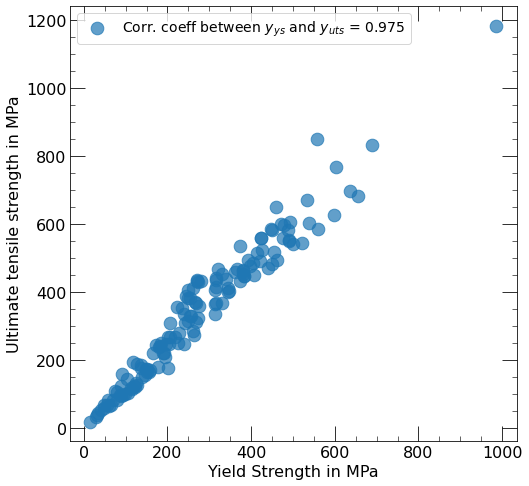

In [7]:

plt.figure(figsize=(8,8))

plt.scatter(df_final['YS'],df_final['UTS'],s=160,alpha=0.7,label='Corr. coeff between $y_{ys}$ and $y_{uts}$ = 0.975')

plt.legend(prop={'size': 14})

plt.xlabel('Yield Strength in MPa',size=16)
plt.ylabel('Ultimate tensile strength in MPa',size=16)
plt.minorticks_on()
plt.tick_params(labelsize=16)
plt.tick_params(direction='in',which='major', length=15, bottom=True, top=True, left=True, right=True,colors='k')
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True,colors='k')


### Composite Target vs Yield strength plot

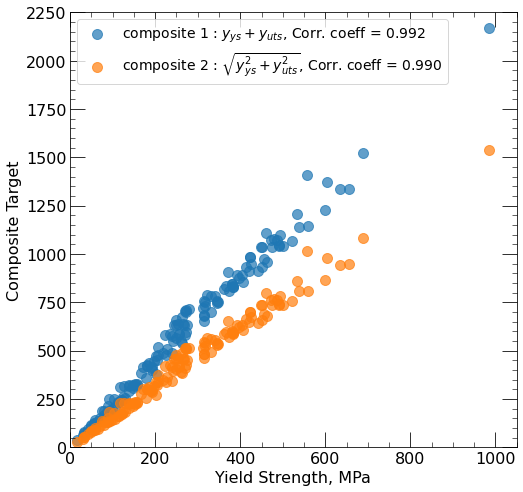

In [28]:
plt.figure(figsize=(8,8))

plt.scatter(df_final['YS'],df_final['add'],s=100, alpha=0.7, label='composite 1 : $y_{ys}+y_{uts}$, Corr. coeff = 0.992')

plt.scatter(df_final['YS'],df_final['sqrt'],s=100, alpha=0.7, label='composite 2 : $\sqrt{y_{ys}^2+y_{uts}^2}$, Corr. coeff = 0.990' )
plt.legend()
plt.xlim(0,1050)
plt.ylim(0,2250)

plt.legend(prop={'size': 14})

plt.xlabel('Yield Strength, MPa', size=16)
plt.ylabel('Composite Target',size=16)

plt.minorticks_on()
plt.tick_params(labelsize=16)
plt.tick_params(direction='in',which='major', length=15, bottom=True, top=True, left=True, right=True,colors='k')
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True,colors='k')


## Composite Target Multiplication 

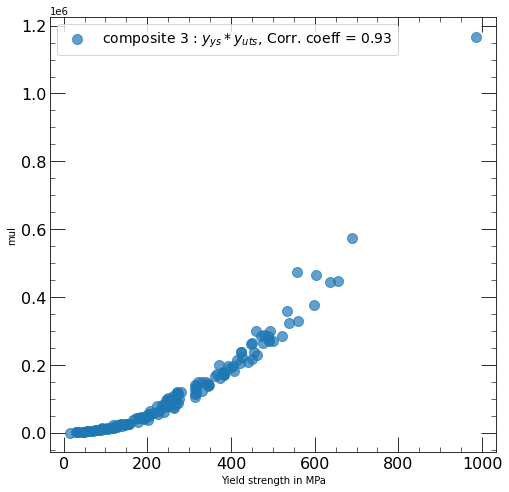

In [20]:
df_final['mul'] = df_final['YS']*df_final['UTS']
plt.figure(figsize=(8,8))
plt.scatter(df_final['YS'],df_final['mul'],s=100, alpha=0.7, label='composite 3 : $y_{ys}*y_{uts}$, Corr. coeff = 0.93')
plt.ylabel('mul')
plt.xlabel('Yield strength in MPa')
plt.legend(prop={'size':14})

plt.minorticks_on()
plt.tick_params(labelsize=16)
plt.tick_params(direction='in',which='major', length=15, bottom=True, top=True, left=True, right=True,colors='k')
plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True,colors='k')



In [15]:
df_final.corr()

,YS,UTS,add,sqrt,mul
YS,1.000000,0.975169,0.992552,0.990905,0.933702
UTS,0.975169,1.000000,0.994885,0.996089,0.920920
add,0.992552,0.994885,1.000000,0.999911,0.932470
sqrt,0.990905,0.996089,0.999911,1.000000,0.931402
mul,0.933702,0.920920,0.932470,0.931402,1.000000
